In [72]:
import os
import sys
import shlex
import subprocess
from glob import glob
from os.path import join
import math as m
import numpy as np
import pyfits
from pylab import *
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.io import ascii
from astropy.stats import funcs
from astropy.table import Table

In [24]:
im_dir = 'data/xcs/'
im_suffix = '*.fits.fz'
im_file=glob(join(im_dir, im_suffix))
print im_file

['data/xcs/xcs0083000101_r_d1.fits.fz', 'data/xcs/xcs0083000101_r_d2.fits.fz', 'data/xcs/xcs0083000101_z_d1.fits.fz', 'data/xcs/xcs0083000101_z_d2.fits.fz', 'data/xcs/xcs0142610101_r_d1.fits.fz', 'data/xcs/xcs0142610101_r_d2.fits.fz', 'data/xcs/xcs0142610101_z_d1.fits.fz', 'data/xcs/xcs0142610101_z_d2.fits.fz']


In [8]:
for file in im_file:
    print 'Unpacking file ', file
    cmd='funpack '+file
    subprocess.call(cmd,shell=True)

Unpacking file  data/xcs/xcs0083000101_r_d1.fits.fz
Unpacking file  data/xcs/xcs0083000101_r_d2.fits.fz
Unpacking file  data/xcs/xcs0083000101_z_d1.fits.fz
Unpacking file  data/xcs/xcs0083000101_z_d2.fits.fz
Unpacking file  data/xcs/xcs0142610101_r_d1.fits.fz
Unpacking file  data/xcs/xcs0142610101_r_d2.fits.fz
Unpacking file  data/xcs/xcs0142610101_z_d1.fits.fz
Unpacking file  data/xcs/xcs0142610101_z_d2.fits.fz


In [25]:
im_suffix = '*.fits'
im_file=glob(join(root, root_end))
print im_file

['data/xcs/xcs0083000101_r_d1.fits', 'data/xcs/xcs0083000101_r_d2.fits', 'data/xcs/xcs0083000101_z_d1.fits', 'data/xcs/xcs0083000101_z_d2.fits', 'data/xcs/xcs0142610101_r_d1.fits', 'data/xcs/xcs0142610101_r_d2.fits', 'data/xcs/xcs0142610101_z_d1.fits', 'data/xcs/xcs0142610101_z_d2.fits']


In [27]:
sex_dir='sextractor/'
if not os.path.exists(sex_dir):
    os.mkdir(sex_dir)

cat_file=[]
for i in range(len(im_file)):
    cat_file.append(im_file[i].replace(im_dir,sex_dir).replace('.fits','_cat.ldac'))
print cat_file

['sextractor/xcs0083000101_r_d1_cat.ldac', 'sextractor/xcs0083000101_r_d2_cat.ldac', 'sextractor/xcs0083000101_z_d1_cat.ldac', 'sextractor/xcs0083000101_z_d2_cat.ldac', 'sextractor/xcs0142610101_r_d1_cat.ldac', 'sextractor/xcs0142610101_r_d2_cat.ldac', 'sextractor/xcs0142610101_z_d1_cat.ldac', 'sextractor/xcs0142610101_z_d2_cat.ldac']


In [28]:
file = open(sex_dir+"gauss_3.0_5x5.conv", 'w')
file.write("CONV NORM\n")
file.write("# 5x5 convolution mask of a gaussian PSF with FWHM = 3.0 pixels.\n")
file.write("0.092163 0.221178 0.296069 0.221178 0.092163\n")
file.write("0.221178 0.530797 0.710525 0.530797 0.221178\n")
file.write("0.296069 0.710525 0.951108 0.710525 0.296069\n")
file.write("0.221178 0.530797 0.710525 0.530797 0.221178\n")
file.write("0.092163 0.221178 0.296069 0.221178 0.092163\n")
file.close()

In [78]:
file = open(sex_dir+"kp4m_mosaic.param", 'w')
file.write("NUMBER                 Running object number                                      \n")
file.write("X_IMAGE                Object position along x                                    [pixel]\n")
file.write("Y_IMAGE                Object position along y                                    [pixel]\n")
file.write("XWIN_IMAGE             Windowed position estimate along x                         [pixel]\n")
file.write("YWIN_IMAGE             Windowed position estimate along y                         [pixel]\n")
file.write("ERRAWIN_IMAGE          RMS windowed pos error along major axis                    [pixel]\n")
file.write("ERRBWIN_IMAGE          RMS windowed pos error along minor axis                    [pixel]\n")
file.write("ERRTHETAWIN_IMAGE      Windowed error ellipse pos angle (CCW/x)                   [deg]\n")
file.write("ALPHA_J2000            Right ascension of barycenter (J2000)                      [deg]\n")
file.write("DELTA_J2000            Declination of barycenter (J2000)                          [deg]\n")
file.write("FLUX_APER(1)           # Flux vector within fixed circular aperture(s)            [count]\n")
file.write("FLUXERR_APER(1)        # RMS error vector for aperture flux(es)                   [count]\n")
file.write("FLUX_AUTO              Flux within a Kron-like elliptical aperture                [count]\n")
file.write("FLUXERR_AUTO           RMS error for AUTO flux                                    [count]\n")
file.write("MAG_AUTO               Kron-like elliptical aperture magnitude                    [mag]\n")
file.write("MAGERR_AUTO            RMS error for AUTO magnitude                               [mag]\n")
file.write("KRON_RADIUS            Kron apertures in units of A or B                          \n")
file.write("A_IMAGE                Profile RMS along major axis                               [pixel]\n")
file.write("B_IMAGE                Profile RMS along minor axis                               [pixel]\n")
file.write("THETA_IMAGE            Position angle (CCW/x)                                     [deg]\n")
file.write("ELLIPTICITY            1 - B_IMAGE/A_IMAGE                                        \n")
file.write("FLUX_MAX               Peak flux above background                                 [count]\n")
file.write("FWHM_IMAGE             FWHM assuming a gaussian core                              [pixel]\n")
file.write("FLUX_RADIUS(1)         # Fraction-of-light radii                                  [pixel]\n")
file.write("CLASS_STAR             S/G classifier output\n")
file.write("FLAGS                  Extraction flags                                           \n")
file.close()

In [79]:
cmd='sex -d > '+sex_dir+'kp4m_mosaic.sex'
subprocess.call(cmd,shell=True)
cmd='cat '+sex_dir+'kp4m_mosaic.sex'
print subprocess.check_output(cmd,shell=True)

# Default configuration file for SExtractor 2.19.5
# EB 2015-12-16
#
 
#-------------------------------- Catalog ------------------------------------
 
CATALOG_NAME     test.cat       # name of the output catalog
CATALOG_TYPE     ASCII_HEAD     # NONE,ASCII,ASCII_HEAD, ASCII_SKYCAT,
                                # ASCII_VOTABLE, FITS_1.0 or FITS_LDAC
PARAMETERS_NAME  default.param  # name of the file containing catalog contents
 
#------------------------------- Extraction ----------------------------------
 
DETECT_TYPE      CCD            # CCD (linear) or PHOTO (with gamma correction)
DETECT_MINAREA   5              # min. # of pixels above threshold
DETECT_THRESH    1.5            # <sigmas> or <threshold>,<ZP> in mag.arcsec-2
ANALYSIS_THRESH  1.5            # <sigmas> or <threshold>,<ZP> in mag.arcsec-2
 
FILTER           Y              # apply filter for detection (Y or N)?
FILTER_NAME      default.conv   # name of the file containing the filter
 
DEBLEND_NTHRESH  32           

In [80]:
sex_conf_file=sex_dir+'kp4m_mosaic.sex'
sex_param_file=sex_dir+'kp4m_mosaic.param'
sex_conv_file=sex_dir+'gauss_3.0_5x5.conv'
sex_starnnw_file=sex_dir+'default.nnw'
sex_cat_type='FITS_LDAC'
sex_zp='30.'
sex_pixel_scale='0.258'
sex_seeing_fwhm='1.2'
sex_phot_apertures=str(2*3*float(sex_seeing_fwhm)/float(sex_pixel_scale))
sex_satur_level='36000'
sex_mem_pixstack='1000000'
sex_check_type='BACKGROUND,FILTERED'
sex_check_name=sex_dir+'science.CHECK_BACKGROUND.fits'+','+sex_dir+'science.CHECK_FILTERED.fits'

In [81]:
for i in range(len(im_file)):
    cmd='sex -c '+sex_conf_file+' -PARAMETERS_NAME '+sex_param_file+' -FILTER_NAME '+sex_conv_file+' -STARNNW_NAME '+sex_starnnw_file+' -CATALOG_TYPE '+sex_cat_type+' -MAG_ZEROPOINT '+sex_zp+' -PIXEL_SCALE '+sex_pixel_scale+' -SEEING_FWHM '+sex_seeing_fwhm+' -PHOT_APERTURES '+sex_phot_apertures+' -SATUR_LEVEL '+sex_satur_level+' -MEMORY_PIXSTACK '+sex_mem_pixstack+' -CHECKIMAGE_TYPE '+sex_check_type+' -CHECKIMAGE_NAME '+sex_check_name+' -CATALOG_NAME '+cat_file[i]+' '+im_file[i]
    cmd_args=shlex.split(cmd)
    print cmd
    proc = subprocess.Popen(cmd_args,stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = proc.communicate()
    print stderr[-100:-1]

sex -c sextractor/kp4m_mosaic.sex -PARAMETERS_NAME sextractor/kp4m_mosaic.param -FILTER_NAME sextractor/gauss_3.0_5x5.conv -STARNNW_NAME sextractor/default.nnw -CATALOG_TYPE FITS_LDAC -MAG_ZEROPOINT 30. -PIXEL_SCALE 0.258 -SEEING_FWHM 1.2 -PHOT_APERTURES 27.9069767442 -SATUR_LEVEL 36000 -MEMORY_PIXSTACK 1000000 -CHECKIMAGE_TYPE BACKGROUND,FILTERED -CHECKIMAGE_NAME sextractor/science.CHECK_BACKGROUND.fits,sextractor/science.CHECK_FILTERED.fits -CATALOG_NAME sextractor/xcs0083000101_r_d1_cat.ldac data/xcs/xcs0083000101_r_d1.fits
     

> Closing files
> 
> All done (in 27.4 s: 149.7 lines/s , 62.2 detections/s)
sex -c sextractor/kp4m_mosaic.sex -PARAMETERS_NAME sextractor/kp4m_mosaic.param -FILTER_NAME sextractor/gauss_3.0_5x5.conv -STARNNW_NAME sextractor/default.nnw -CATALOG_TYPE FITS_LDAC -MAG_ZEROPOINT 30. -PIXEL_SCALE 0.258 -SEEING_FWHM 1.2 -PHOT_APERTURES 27.9069767442 -SATUR_LEVEL 36000 -MEMORY_PIXSTACK 1000000 -CHECKIMAGE_TYPE BACKGROUND,FILTERED -CHECKIMAGE_NAME sextractor/scien

In [83]:
hdulist=fits.open(cat_file[0])
cat_data=hdulist[2].data
print cat_data.columns
cat_data['NUMBER']

ColDefs(
    name = 'NUMBER'; format = '1J'; disp = 'I10'
    name = 'X_IMAGE'; format = '1E'; unit = 'pixel'; disp = 'F11.4'
    name = 'Y_IMAGE'; format = '1E'; unit = 'pixel'; disp = 'F11.4'
    name = 'XWIN_IMAGE'; format = '1D'; unit = 'pixel'; disp = 'F11.4'
    name = 'YWIN_IMAGE'; format = '1D'; unit = 'pixel'; disp = 'F11.4'
    name = 'ERRAWIN_IMAGE'; format = '1E'; unit = 'pixel'; disp = 'F9.5'
    name = 'ERRBWIN_IMAGE'; format = '1E'; unit = 'pixel'; disp = 'F9.5'
    name = 'ERRTHETAWIN_IMAGE'; format = '1E'; unit = 'deg'; disp = 'F6.2'
    name = 'ALPHA_J2000'; format = '1D'; unit = 'deg'; disp = 'F11.7'
    name = 'DELTA_J2000'; format = '1D'; unit = 'deg'; disp = 'F11.7'
    name = 'FLUX_APER'; format = '1E'; unit = 'count'; disp = 'G12.7'
    name = 'FLUXERR_APER'; format = '1E'; unit = 'count'; disp = 'G12.7'
    name = 'FLUX_AUTO'; format = '1E'; unit = 'count'; disp = 'G12.7'
    name = 'FLUXERR_AUTO'; format = '1E'; unit = 'count'; disp = 'G12.7'
    name = 'MAG_A

array([   1,    2,    3, ..., 1759, 1760, 1761], dtype=int32)

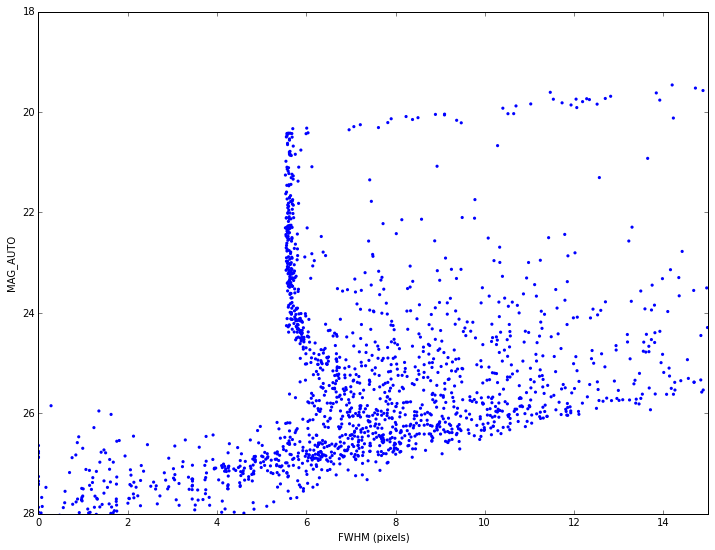

In [97]:
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(111)
ax1.set_ylim([28,18])
ax1.set_xlim([0,15])
ax1.set_xlabel('FWHM (pixels)')
ax1.set_ylabel('MAG_AUTO')
ax1.scatter(cat_data['FWHM_IMAGE'],cat_data['MAG_AUTO'],color='blue',s=10,edgecolor='none')

## Now Scamp

In [69]:
scamp_dir='scamp/'
if not os.path.exists(scamp_dir):
    os.mkdir(scamp_dir)

scamp_list_file='scamp_list_file.dat'
file = open(scamp_list_file, 'w')
for i in range(len(cat_file)):
    file.write(cat_file[i]+'\n')
file.close()

In [71]:
cmd='scamp -d > '+scamp_dir+'kp4m_mosaic.scamp'
subprocess.call(cmd,shell=True)
cmd='cat '+scamp_dir+'kp4m_mosaic.scamp'
print subprocess.check_output(cmd,shell=True)

# Default configuration file for SCAMP 2.2.6
# EB 2015-12-16
#
 
#----------------------------- Field grouping ---------------------------------
 
FGROUP_RADIUS          1.0             # Max dist (deg) between field groups
 
#---------------------------- Reference catalogs ------------------------------
 
REF_SERVER         cocat1.u-strasbg.fr # Internet addresses of catalog servers
ASTREF_CATALOG         2MASS           # NONE, FILE, USNO-A1,USNO-A2,USNO-B1,
                                       # GSC-1.3,GSC-2.2,GSC-2.3, TYCHO-2,
                                       # UCAC-1,UCAC-2,UCAC-3,UCAC-4, URAT-1,
                                       # NOMAD-1, PPMX, CMC-14, 2MASS, DENIS-3,
                                       # SDSS-R3,SDSS-R5,SDSS-R6,SDSS-R7,
                                       # SDSS-R8, SDSS-R9
ASTREF_BAND            DEFAULT         # Photom. band for astr.ref.magnitudes
                                       # or DEFAULT, BLUEST, or REDDEST
ASTREFMAG_LIMITS    

In [110]:
scamp_pos_error='1.2'
scamp_scale_error='1.02'
scamp_angle_error='0.02'
scamp_sn_thresholds='30.,60.'
scamp_fwhm_thresholds='2.,10.'
scamp_pixel_scale='0.258'
scamp_crossid_radius='0.65' #Suggestion is 2.5*Pixel_scale
scamp_distort_degrees='4'
scamp_astref_catalog = '2MASS'
scamp_astref_band = 'Ks'
scamp_astrefmag_limits='6.,20.' 
scamp_match_resol='0.'

scamp_list_file='scamp_list_file.dat'
scamp_conf_file=scamp_dir+'kp4m_mosaic.scamp'
scamp_refcat_dir = scamp_dir+'refcat'
scamp_dir_out = scamp_dir+'scamp_ORDER_'+scamp_distort_degrees+'_REFCAT_'+scamp_astref_catalog
scamp_cat_file = scamp_dir_out+'/scamp_mosaic_cat.ldac'
scamp_cat_type = 'FITS_LDAC'
scamp_xml_file = scamp_dir_out+'/scamp_mosaic_xml.xml'
scamp_check_type = 'SKY_ALL,FGROUPS,DISTORTION,ASTR_INTERROR2D,ASTR_INTERROR1D,ASTR_REFERROR2D,ASTR_REFERROR1D,ASTR_CHI2,PHOT_ERROR'
scamp_check_file =  ','.join([scamp_dir_out+'/'+file for file in ['sky_all','fgroups','distort','astr_interror2d','astr_interror1d','astr_referror2d','astr_referror1d','astr_chi2','psphot_error']])

In [111]:
if not os.path.exists(scamp_refcat_dir):
    os.mkdir(scamp_refcat_dir)
    
if not os.path.exists(scamp_dir_out):
    os.mkdir(scamp_dir_out)

cmd='scamp @'+scamp_list_file+' -c '+scamp_conf_file+' -MERGEDOUTCAT_TYPE '+scamp_cat_type+' -MERGEDOUTCAT_NAME '+scamp_cat_file+' -MATCH Y -WRITE_XML Y -XML_NAME '+scamp_xml_file+' -SAVE_REFCATALOG Y -REFOUT_CATPATH '+scamp_refcat_dir+' -CHECKPLOT_DEV PSC -CHECKPLOT_ANTIALIAS Y -CHECKPLOT_TYPE '+scamp_check_type + ' -CHECKPLOT_NAME '+scamp_check_file + ' -ASTREF_CATALOG '+scamp_astref_catalog+' -ASTREF_BAND '+scamp_astref_band+' -ASTREFMAG_LIMITS '+scamp_astrefmag_limits+' -DISTORT_DEGREES '+scamp_distort_degrees+' -PHOTCLIP_NSIGMA 2. -SOLVE_ASTROM Y -SOLVE_PHOTOM N -POSITION_MAXERR '+scamp_pos_error+' -PIXSCALE_MAXERR '+scamp_scale_error+' -POSANGLE_MAXERR '+scamp_angle_error+' -SN_THRESHOLDS '+scamp_sn_thresholds+' -FWHM_THRESHOLDS '+scamp_fwhm_thresholds+' -CROSSID_RADIUS '+scamp_crossid_radius+' -MATCH_RESOL '+scamp_match_resol
cmd_args=shlex.split(cmd)
print cmd

scamp @scamp_list_file.dat -c scamp/kp4m_mosaic.scamp -MERGEDOUTCAT_TYPE FITS_LDAC -MERGEDOUTCAT_NAME scamp/scamp_ORDER_4_REFCAT_2MASS/scamp_mosaic_cat.ldac -MATCH Y -WRITE_XML Y -XML_NAME scamp/scamp_ORDER_4_REFCAT_2MASS/scamp_mosaic_xml.xml -SAVE_REFCATALOG Y -REFOUT_CATPATH scamp/refcat -CHECKPLOT_DEV PSC -CHECKPLOT_ANTIALIAS Y -CHECKPLOT_TYPE SKY_ALL,FGROUPS,DISTORTION,ASTR_INTERROR2D,ASTR_INTERROR1D,ASTR_REFERROR2D,ASTR_REFERROR1D,ASTR_CHI2,PHOT_ERROR -CHECKPLOT_NAME scamp/scamp_ORDER_4_REFCAT_2MASS/sky_all,scamp/scamp_ORDER_4_REFCAT_2MASS/fgroups,scamp/scamp_ORDER_4_REFCAT_2MASS/distort,scamp/scamp_ORDER_4_REFCAT_2MASS/astr_interror2d,scamp/scamp_ORDER_4_REFCAT_2MASS/astr_interror1d,scamp/scamp_ORDER_4_REFCAT_2MASS/astr_referror2d,scamp/scamp_ORDER_4_REFCAT_2MASS/astr_referror1d,scamp/scamp_ORDER_4_REFCAT_2MASS/astr_chi2,scamp/scamp_ORDER_4_REFCAT_2MASS/psphot_error -ASTREF_CATALOG 2MASS -ASTREF_BAND Ks -ASTREFMAG_LIMITS 6.,20. -DISTORT_DEGREES 4 -PHOTCLIP_NSIGMA 2. -SOLVE_ASTROM

In [112]:
proc = subprocess.Popen(cmd_args,stdout=subprocess.PIPE, stderr=subprocess.PIPE)
stdout, stderr = proc.communicate()
print stderr

OSError: [Errno 2] No such file or directory